In [0]:
from fastai import *
from fastai.vision import *

In [3]:
#Downloading and extracting data
path = untar_data(URLs.FOOD)
path

PosixPath('/root/.fastai/data/food-101')

#Food-101 dataset

The Food-101 dataset has 101 food categories, with 1000 images provided for each category for a total of 101,000 images. The Food-101 dataset provides a list of examples for training as well as another list for testing. Since the dataset specifies an equal amount of examples for each category, we do not need to worry about class imbalances. For each category, 250 images are in the test set and 750 for the training set. The training set is split into 20% for the validation set and 80% for the training set.

Training set: 60600 images
Validation set: 15150 images
Test set: 25250 images

The validation set is used to check the performance of the model after each training epoch. The test set is evaluated only once at the end of this notebook to provide a final accuracy score.

The examples for each category are located in subdirectories with the category names. The file list is treated like a csv file, though now delimited with a '/' symbol. This is read using Pandas into a Pandas DataFrame structure and then is modified so that the paths and .jpg file extensions are added. Fast AI provides a way of reading the DataFrame structure and indicating that the labels are in column 0 and the examples are in column 1.

The images are resized to 224x224 for faster training of the model. Data augmentation during training uses the default set of transforms provided by the Fast AI library as well as the default parameters. These are provided by the get_transforms() method. Since it's difficult to see what parameters and transforms are used from this method, the extracted list and parameters are provided below(ds_tfms). The pixel values of the examples are also normalized based on the ImageNet values. These examples could have been normalized by determining the mean & standard deviation of this specific dataset, but it appears that the ImageNet values were sufficient for a good result.


In [4]:
path.ls()

[PosixPath('/root/.fastai/data/food-101/train.txt'),
 PosixPath('/root/.fastai/data/food-101/test.txt'),
 PosixPath('/root/.fastai/data/food-101/h5'),
 PosixPath('/root/.fastai/data/food-101/images'),
 PosixPath('/root/.fastai/data/food-101/classes.txt'),
 PosixPath('/root/.fastai/data/food-101/test.json'),
 PosixPath('/root/.fastai/data/food-101/train.json'),
 PosixPath('/root/.fastai/data/food-101/labels.txt')]

In [0]:
image_path = path/'images'

In [0]:
data = ImageDataBunch.from_folder(path=image_path,valid_pct=0.1,size=224)

In [0]:
data.normalize()

ImageDataBunch;

Train: LabelList (90900 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samosa,samosa,samosa,samosa,samosa
Path: /root/.fastai/data/food-101/images;

Valid: LabelList (10100 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
escargots,tuna_tartare,creme_brulee,guacamole,churros
Path: /root/.fastai/data/food-101/images;

Test: None

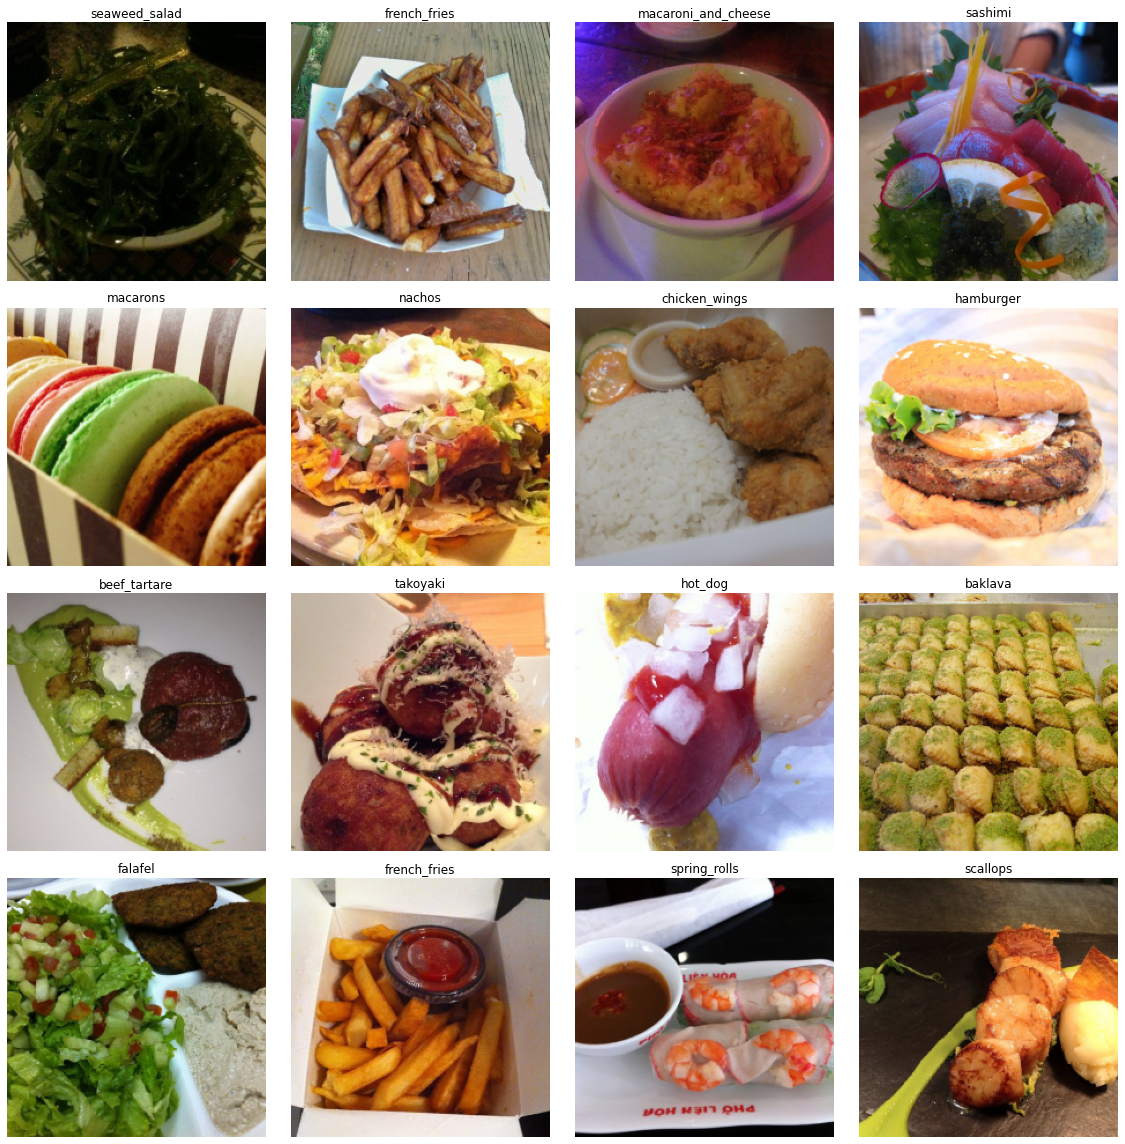

In [0]:
data.show_batch(rows=4)

In [0]:
print(data.classes);data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

101

In [0]:
learner = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learner.fit_one_cycle(3)

In [0]:
path = learner.save('food-101-test-e3',return_path=True)
print(path)

/root/.fastai/data/food-101/images/models/food-101-test-e3.pth


In [0]:
!cp -r '/root/.fastai/data/food-101/images/models/food-101-test-e3.pth' '/content/drive/My Drive/fast_ai/Image_Tasks/Food_Classification'

In [0]:
learner = cnn_learner(data,models.resnet34,metrics=[error_rate,partial(top_k_accuracy,k=5)],callback_fns=ShowGraph)
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (90900 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samosa,samosa,samosa,samosa,samosa
Path: /root/.fastai/data/food-101/images;

Valid: LabelList (10100 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
escargots,tuna_tartare,creme_brulee,guacamole,churros
Path: /root/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 6.31E-06


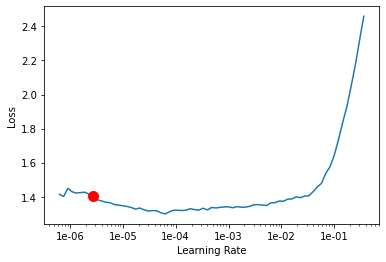

In [0]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

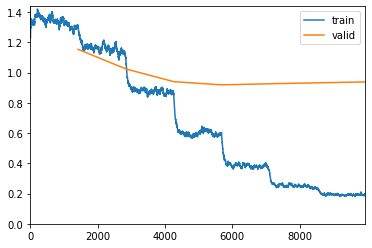

NameError: ignored

In [0]:
learner.unfreeze()
learner.fit_one_cycle(7,max_lr=slice(1e-5,1e-4))


In [0]:
learner.save('food-101-test-e10')
!cp -r '/root/.fastai/data/food-101/images/models/food-101-test-e10.pth' '/content/drive/My Drive/fast_ai/Image_Tasks/Food_Classification'

## So from the above results it is clear that error is increasing so lets stop training more and now increase the image dimensions and also lets try to apply some transforms and lets see how it goes

In [0]:
transforms = get_transforms(do_flip=True,flip_vert=True,max_rotate=25,max_zoom=1,p_lighting=0.75)
data = ImageDataBunch.from_folder(path=image_path,valid_pct=0.1,size=512)

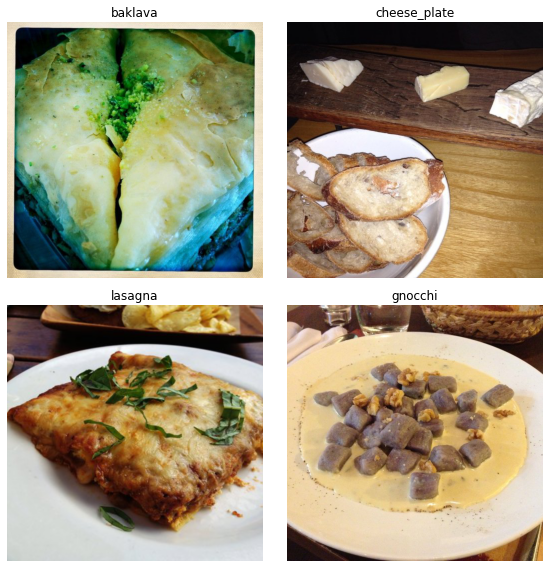

In [7]:
data.show_batch(rows=2)

In [8]:
learner = create_cnn(data,models.resnet34,pretrained=False,metrics=[error_rate,partial(top_k_accuracy,k=5)],callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05
Min loss divided by 10: 2.75E-05


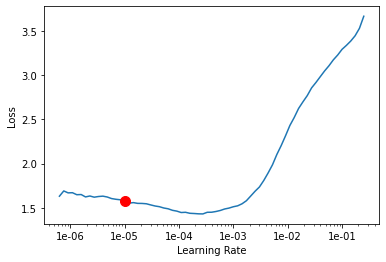

In [0]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

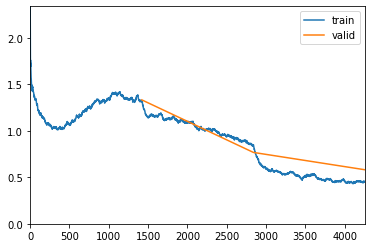

In [0]:
learner.unfreeze()
learner.fit_one_cycle(3,max_lr=slice(1e-4,1e-3))
learner.save('food-101-test-e13')

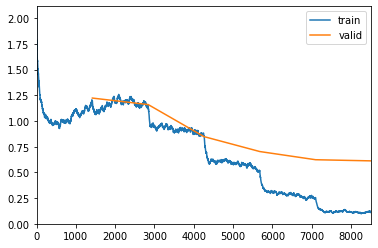

In [0]:
learner.load('/content/drive/My Drive/fast_ai/Image_Tasks/Food_Classification/food-101-test-e10')
learner.fit_one_cycle(6,max_lr=slice(1e-4,1e-3))
learner.save('food-101-test-e16')
!cp -r '/root/.fastai/data/food-101/images/models/food-101-test-e16.pth' '/content/drive/My Drive/fast_ai/Image_Tasks/Food_Classification'

In [9]:
learner.load('/content/drive/My Drive/fast_ai/Image_Tasks/Food_Classification/food-101-test-e16')

Learner(data=ImageDataBunch;

Train: LabelList (90900 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
samosa,samosa,samosa,samosa,samosa
Path: /root/.fastai/data/food-101/images;

Valid: LabelList (10100 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
french_toast,chicken_wings,croque_madame,risotto,hummus
Path: /root/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

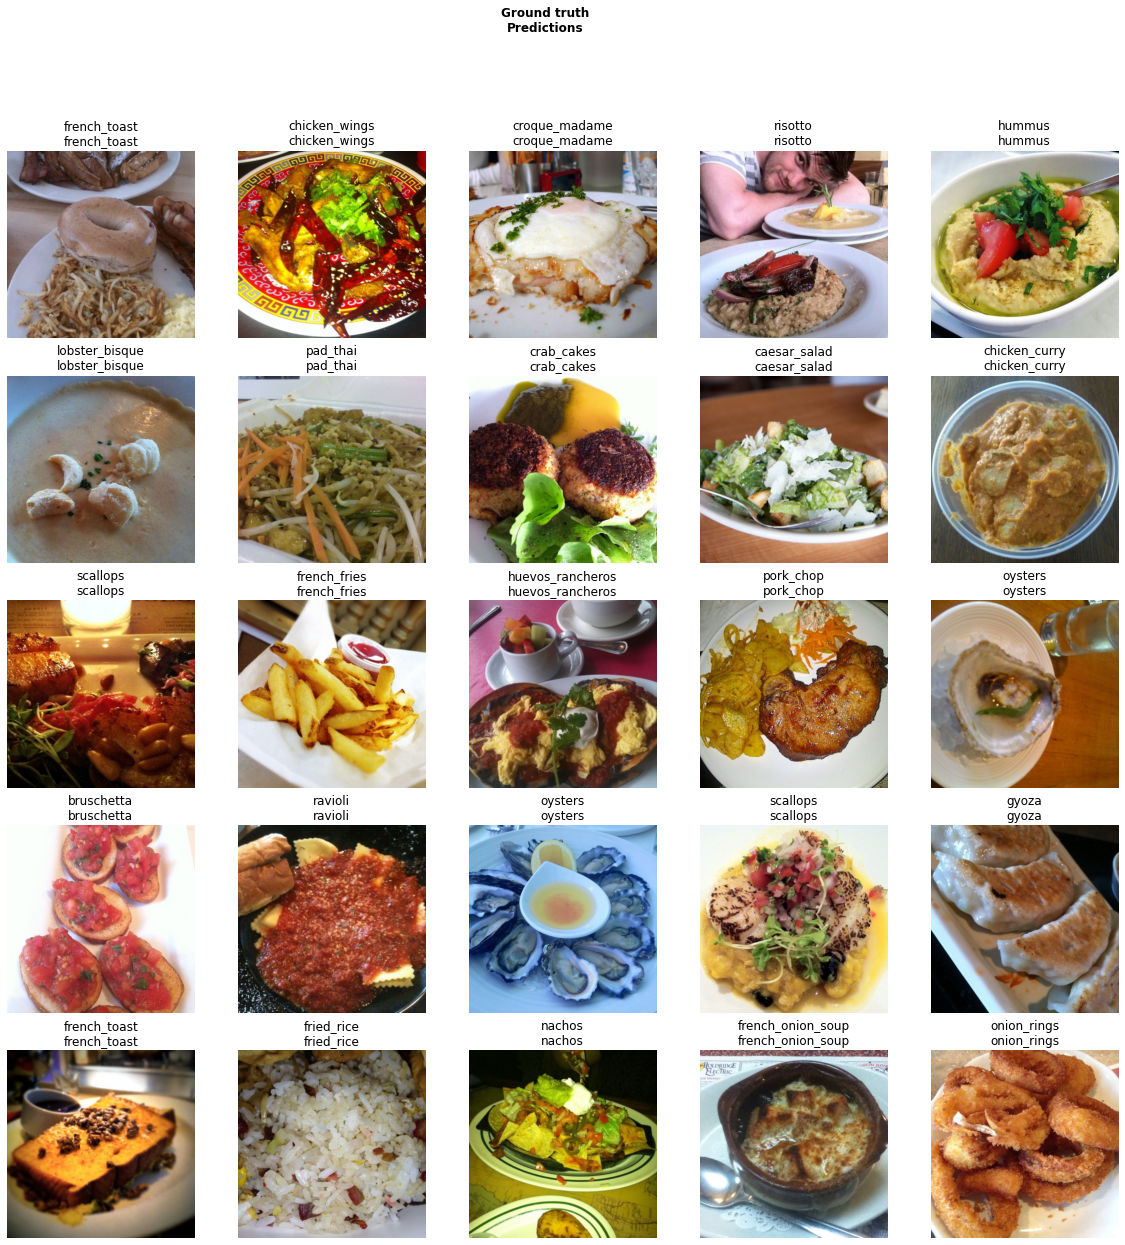

In [10]:
learner.show_results()

In [0]:
from fastai.widgets import *

In [19]:
ds, idxs = DatasetFormatter().from_toplosses(learner,n_imgs=150)

In [21]:
ds

LabelList (90900 items)
x: ImageList
Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300)
y: CategoryList
samosa,samosa,samosa,samosa,samosa
Path: /root/.fastai/data/food-101/images

In [22]:
idxs

tensor([ 9776, 23437, 74242, 14208, 40350, 89869, 60053, 32523, 49580,  3912,
        17652, 76282, 81957, 76538, 73176, 85415, 29916,  9148, 16821, 83988,
        22686, 55121, 82631, 76487, 50946, 79628, 84558,  3876,  4473, 24855,
        23162, 64566, 86161, 90012, 68583, 69322, 22977, 22295, 23419, 64288,
        32207, 52714, 39004, 89984, 40117,  9202, 26228, 89497,  1079,  6199,
        88769, 66750, 38685, 37841, 63791, 27614, 51261,  9933, 36384, 85499,
        72658, 27988,   240,  4241, 13142, 62210, 72454, 33370, 72902, 52750,
        62032, 34583, 20601, 72176, 74165, 30147, 30493, 51755, 70748, 55897,
        32671,  3812, 38293, 86304, 23269,  5277, 26218, 39974, 87219,  1941,
        39076, 23339,  5367, 87990, 49932, 75601, 84532, 66533, 81111,  6272,
        27952, 74791, 55131, 23957, 70157, 27284, 23216, 76552, 84085, 80499,
        60006, 23006,  6074, 25631, 72903, 81536, 18101, 80485,  4452, 27845,
        24207, 60449, 49888, 61918, 61799, 37959, 87601, 21398, 